## drug consumptions.16

נריה ברין, נועה אחרק, אלישיב ניזרי, וורקנש אדייה

<a id='top'></a>

<div>
<img src="https://raw.githubusercontent.com/neriyabrin/Drug-Analysis-project/main/Blog_oxycodone-and-weed.webp" width="800"/>
</div>


https://www.kaggle.com/datasets/obeykhadija/drug-consumptions-uci

In [202]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
url="https://raw.githubusercontent.com/neriyabrin/Drug-Analysis-project/main/Drug_Consumption.xls"
file= pd.read_csv(url)

In [53]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1884 entries, 0 to 1883
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1884 non-null   int64  
 1   Age        1884 non-null   object 
 2   Gender     1884 non-null   object 
 3   Education  1884 non-null   object 
 4   Country    1884 non-null   object 
 5   Ethnicity  1884 non-null   object 
 6   Nscore     1884 non-null   float64
 7   Escore     1884 non-null   float64
 8   Oscore     1884 non-null   float64
 9   AScore     1884 non-null   float64
 10  Cscore     1884 non-null   float64
 11  Impulsive  1884 non-null   float64
 12  SS         1884 non-null   float64
 13  Alcohol    1884 non-null   object 
 14  Amphet     1884 non-null   object 
 15  Amyl       1884 non-null   object 
 16  Benzos     1884 non-null   object 
 17  Caff       1884 non-null   object 
 18  Cannabis   1884 non-null   object 
 19  Choc       1884 non-null   object 
 20  Coke    

 הדאטה מכיל נתוני צריכה של סוגים שונים של סמים על ידי אנשים
בנתונים על האנשים יש חלוקה למדינות ועל פי מוצא, מין, גיל, ורמת השכלה
ויש בנוסף לכל סוג של סם חלוקה לתדירות השימיש בסם.

In [54]:
file['Cannabis'].value_counts()

CL6    463
CL0    412
CL2    266
CL3    211
CL1    207
CL5    185
CL4    140
Name: Cannabis, dtype: int64

CL6 - וכן הלאה, שנצרך ביממה האחרונה CL0 -ולדוגמה פה אפשר לראות את הדירוג שללא שימוש כלל


הפכנו את הדאטה למספרים שיהיה יותר נוח לעבוד

In [129]:
new_file= file.replace(['CL0'], 0)
new_file= new_file.replace(['CL1'], 1)
new_file= new_file.replace(['CL2'], 2)
new_file= new_file.replace(['CL3'], 3)
new_file= new_file.replace(['CL4'], 4)
new_file= new_file.replace(['CL5'], 5)
new_file= new_file.replace(['CL6'], 6)


ממוצע צריכה של כל סם של הדאטה: חוץ משוקולד וקפאין, הכי גבוהים זה אלכוהול, קנאביס, וניקוטין ונתמקד בעיקר בהם בניתוח

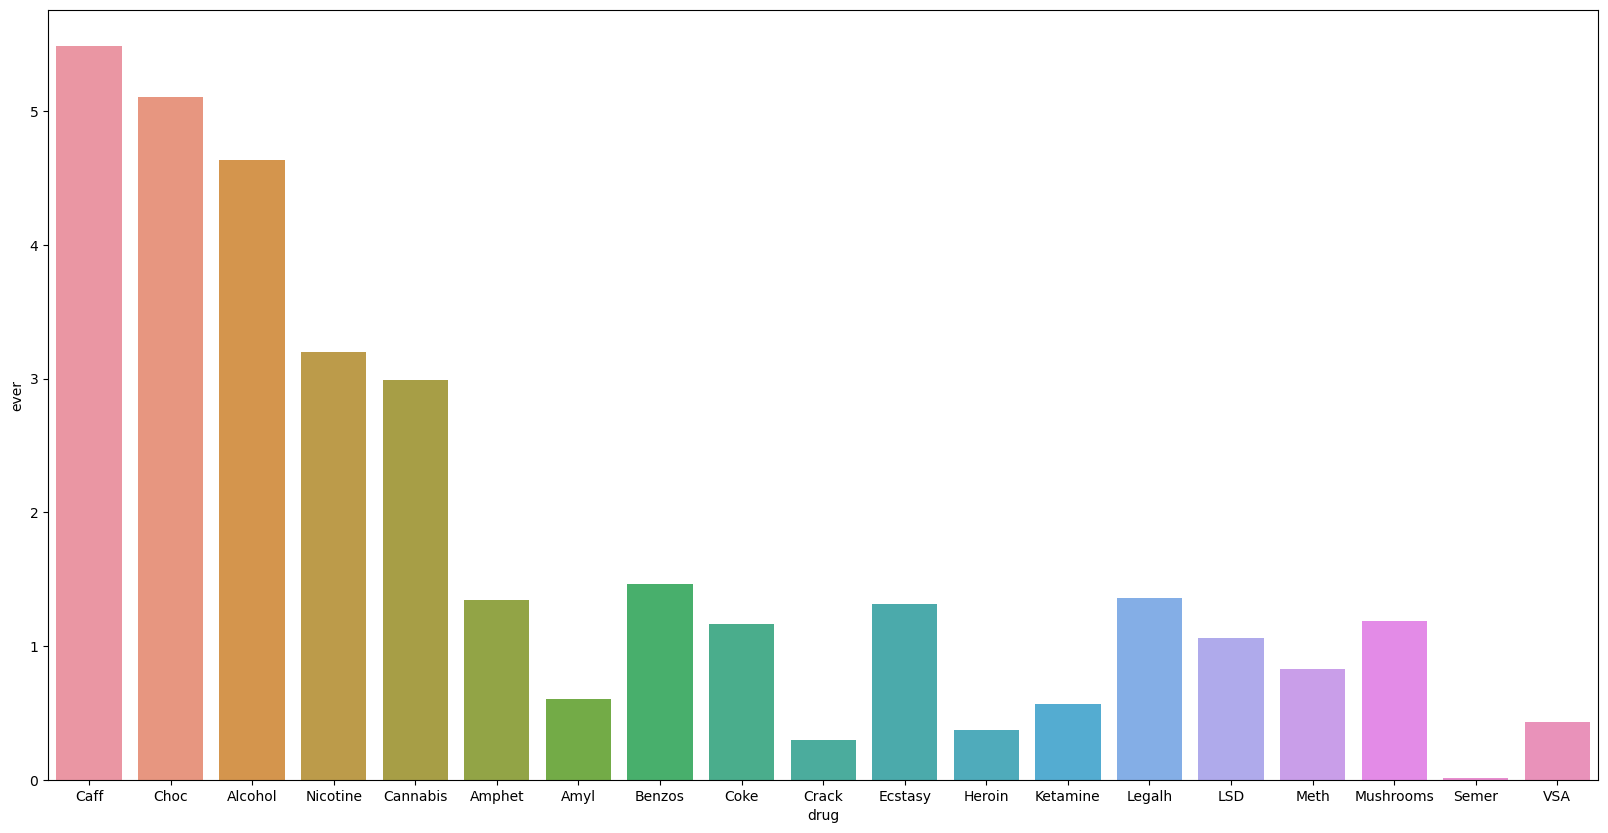

In [131]:
fox=['Caff','Choc','Alcohol','Nicotine','Cannabis','Amphet','Amyl','Benzos','Coke','Crack','Ecstasy','Heroin','Ketamine','Legalh','LSD','Meth','Mushrooms','Semer','VSA']
drug_mean = []
for column in fox:
    mean = new_file[column].mean()
    drug_mean.append(mean)
evrdrug={'drug':fox,'ever':drug_mean}
eve=pd.DataFrame.from_dict(evrdrug)
eve
plt.figure(figsize=(20,10))
sns.barplot(data=eve, x='drug',y='ever')
plt.show()

## ניתוח התמכרות לפי מגדר

יש חצי גברים חצי נשים בדאטה

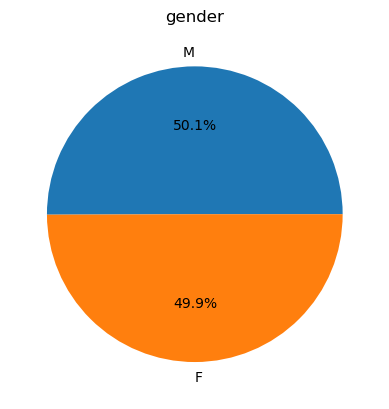

In [133]:
value_counts = new_file['Gender'].value_counts()
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')
plt.title("gender")

plt.show()

בשלושת הקטגוריות הצריכה של הגברים יותר גדולה מנשים

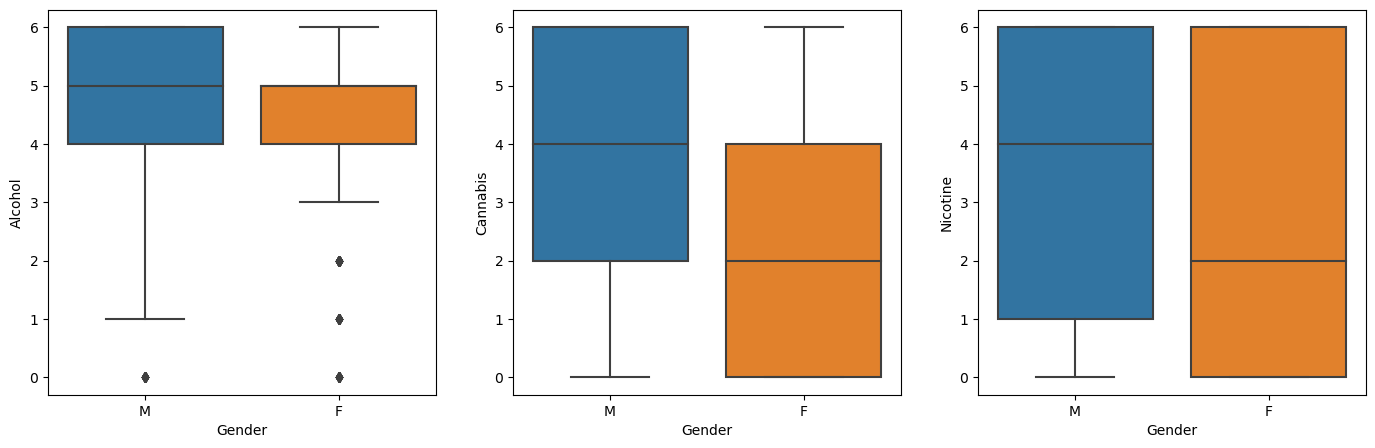

In [134]:
fig, axes = plt.subplots(figsize=(17, 5),ncols=3)
sns.boxplot(data=new_file , x= 'Gender' ,y= 'Alcohol',ax=axes[0])
sns.boxplot(data=new_file , x= 'Gender' ,y= 'Cannabis',ax=axes[1])
sns.boxplot(data=new_file , x= 'Gender' ,y= 'Nicotine',ax=axes[2])
plt.show()

## ניתוח של הדאטה על פי גיל

חלוקה של הדאטה באחוזים לפי גיל

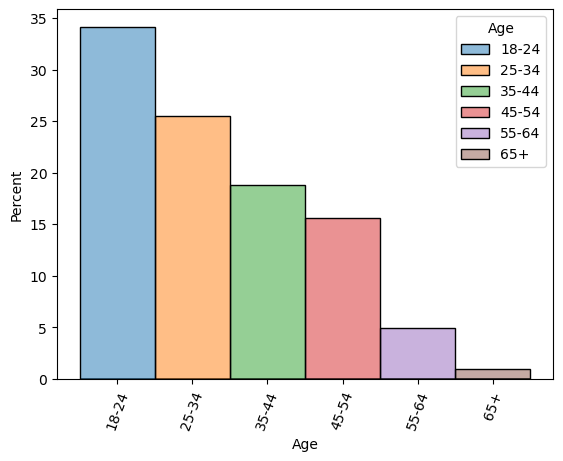

In [141]:

age_column =file['Age'].copy()
sorted_age_column = age_column.sort_values()
plt.xticks(rotation=70)
sns.histplot(data=new_file, x= sorted_age_column ,stat='percent', hue= sorted_age_column)

plt.show()

קנאביס ואלכוהול לפי גיל: צבעים חום וורוד מראים רמה גבוהה של צריכה ככול שיותר גדול כך הצריכה יורדת  

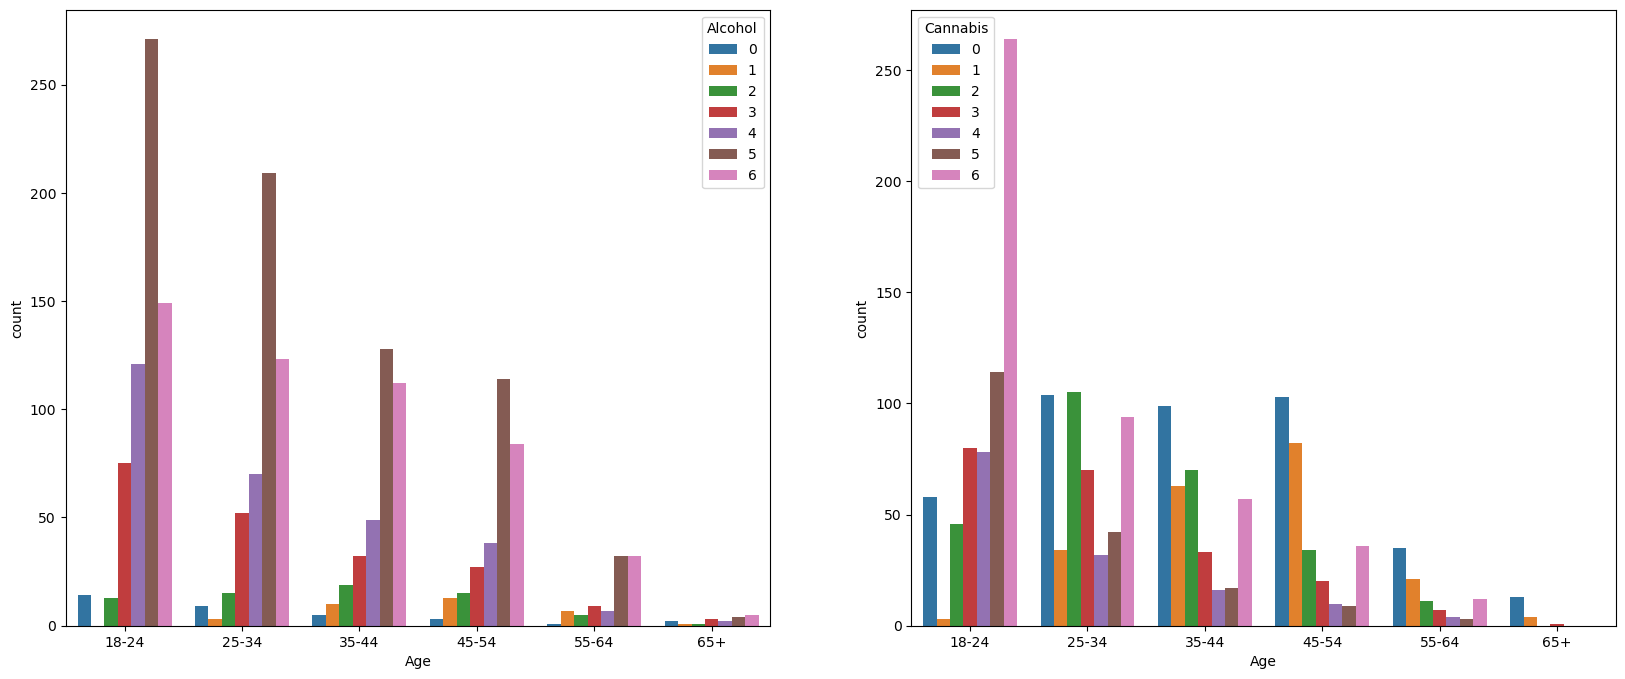

In [148]:
fig, axes = plt.subplots(figsize=(20,8), ncols=2)
age_sort=["18-24","25-34","35-44","45-54","55-64","65+"]
sns.countplot(data=new_file,ax=axes[0],x="Age",hue="Alcohol",order=age_sort)
sns.countplot(data=new_file,ax=axes[1],x="Age",hue="Cannabis",order=age_sort)
plt.show()

פה קישרנו בן גיל למגדר איור מימין זה נשים משמאל גברים. רואים גם ירידה בצריכה וגם שבאיור השמאלי הגברים יש פחות פיזור   

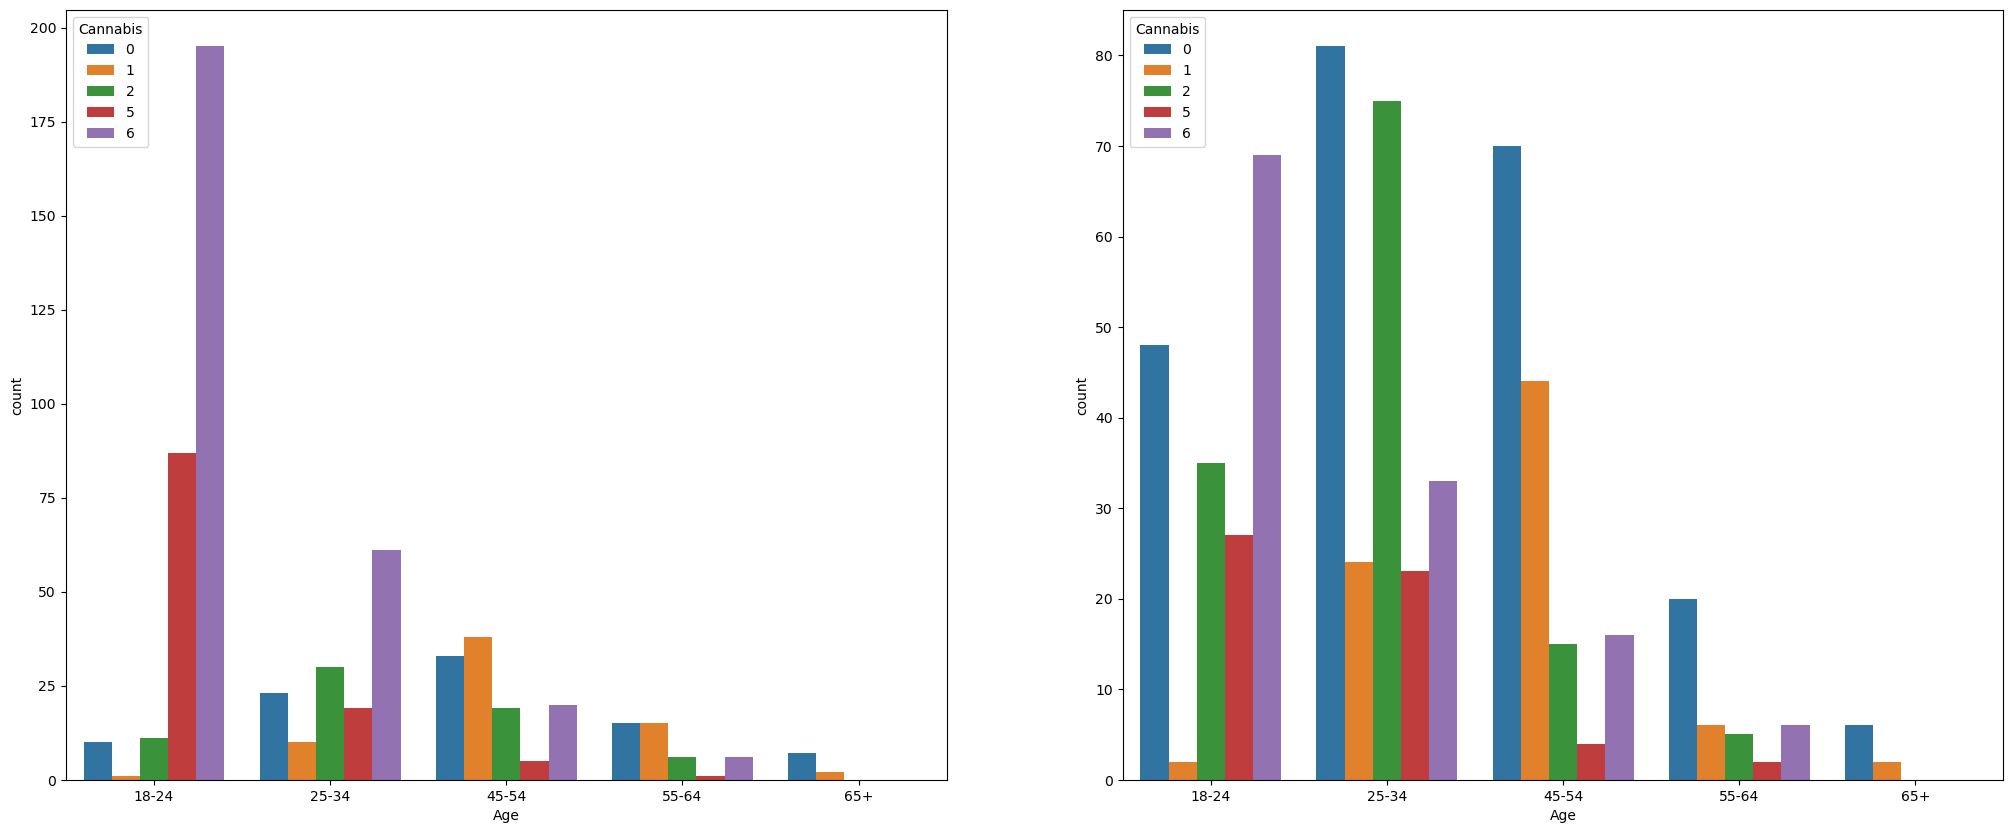

In [157]:
fig, axes= plt.subplots(figsize=(25, 10), ncols= 2)
age_sort= ['18-24','25-34','45-54', '55-64', '65+']
file_1= new_file.loc[:,['Gender','Cannabis','Age']]
file_male= file_1[(file_1.loc[:,'Gender']== 'M')&(file_1.loc[:,'Cannabis']!= 4 )&(file_1.loc[:,'Cannabis']!= 3 )]
file_Female= file_1[(file_1.loc[:,'Gender']== 'F')&(file_1.loc[:,'Cannabis']!= 4 )&(file_1.loc[:,'Cannabis']!= 3 )]
sns.countplot(data=file_male, x= 'Age',ax= axes[0], hue='Cannabis' , order= age_sort)
sns.countplot(data=file_Female, x= 'Age',ax= axes[1], hue='Cannabis', order= age_sort )

plt.show()


## ניתוח צריכה לפי השכלה

נחבר את כל הקטגוריות ל"עזב בית ספר"י

In [158]:
new_file.replace(['Left school at 18 years', 'Left school at 16 years', 'Left school at 17 years','Left school before 16 years'],'Left school',inplace=True)

חלוקת דאטה לפי השכלה

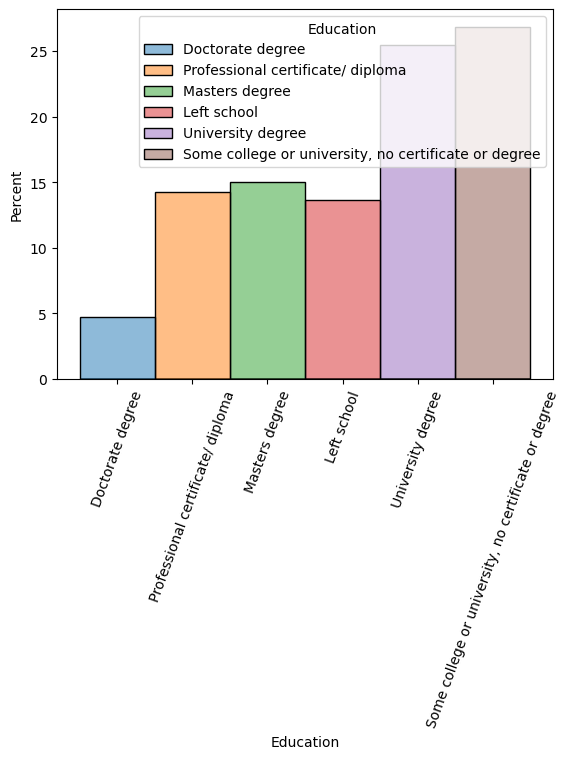

In [162]:

plt.xticks(rotation=70)

sns.histplot(data=new_file, x= 'Education' ,stat='percent', hue= 'Education')
plt.show()

ממוצע שימוש בסמים של כל הדאטה לפי השכלה

In [42]:
med_df = new_file.groupby('Education')[['Alcohol','Nicotine','Cannabis','Amphet','Amyl','Benzos','Coke','Crack','Ecstasy','Heroin','Ketamine','Legalh','LSD','Meth','Mushrooms','Semer','VSA']].mean()

<AxesSubplot:xlabel='Education', ylabel='mean'>

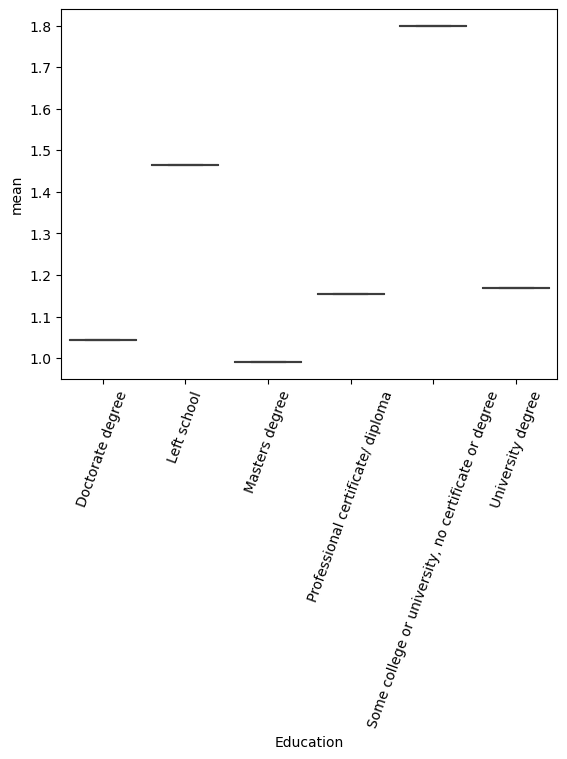

In [163]:
rr=med_df.mean(axis=1).to_frame('mean').reset_index()
plt.xticks(rotation=70)
sns.boxplot(data=rr,x='Education',y='mean')

גם בקנאביס וניקוטין הממוצע גבוה הוא של סטודנטים ללא תואר

C:\Users\Yair\AppData\Local\Temp\ipykernel_17804\3292420687.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


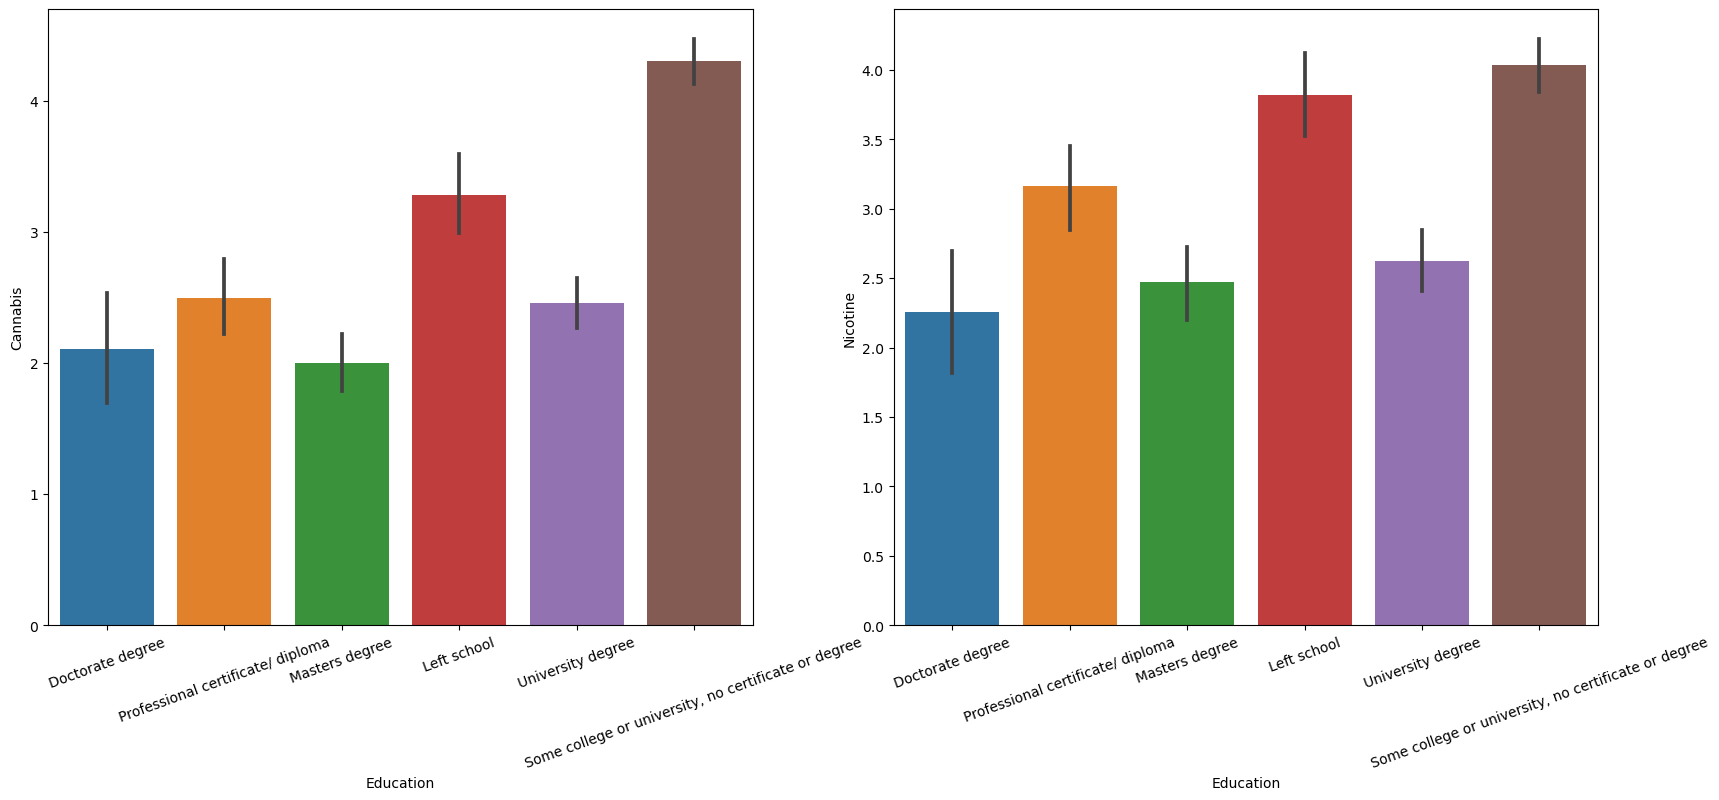

<Figure size 2000x1000 with 0 Axes>

In [164]:
fig, axes = plt.subplots(figsize=(20,8), ncols=2)
plt.figure(figsize=(20,10))
sns.barplot(ax=axes[0],data=new_file, x='Education', y='Cannabis')
sns.barplot(ax=axes[1],data=new_file, x='Education', y='Nicotine')
for ax in axes:
    ax.tick_params(axis='x', rotation=20)
fig.show()

בדקנו האם בן אלכוהול ניקוטין וקנאביס יש קשר

In [97]:
melt=pd.melt(new_file[['Alcohol', 'Cannabis', 'Nicotine']])

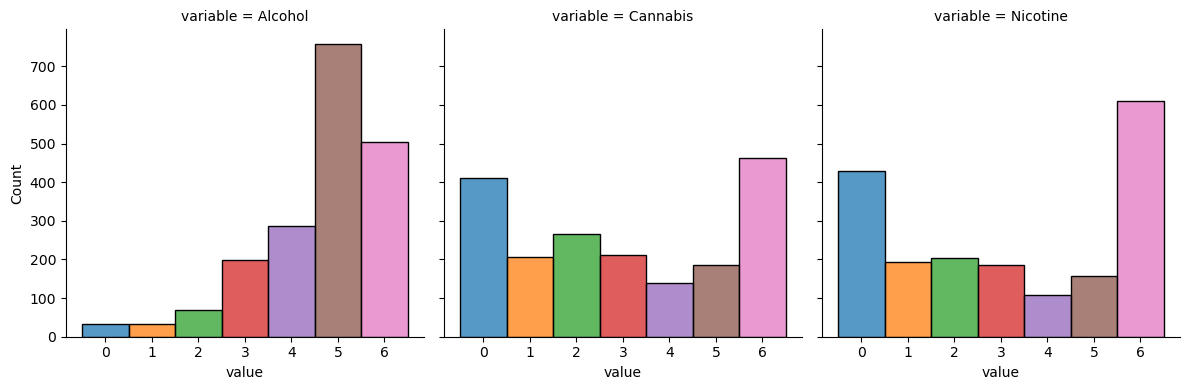

In [98]:
sns.FacetGrid(melt,col="variable",sharex=False,hue="value",col_wrap=3, height=4).map_dataframe(sns.histplot,x="value")
plt.show()

ורואים בהיטמאפ קשר בן שימוש בקנאביס לניקוטין

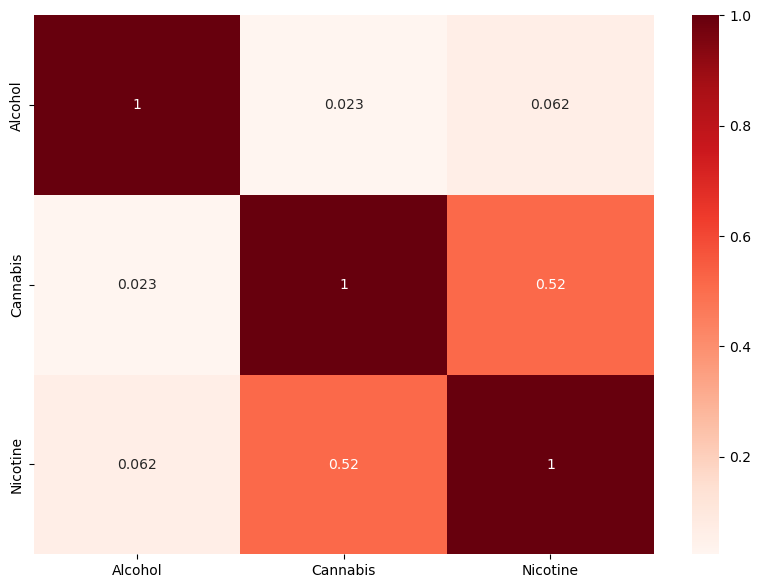

In [165]:
features=new_file[[ 'Alcohol', 'Cannabis','Nicotine']]
df_dummies=pd.get_dummies(features)
corr_matrix=df_dummies.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr_matrix,cmap='Reds',annot=True)
plt.show()

## ניתוח הדאטה לפי מוצא ומדינה

In [166]:
A=file

סיכום באחוזים של מדינה - אלכוהול

In [167]:
UK=A[A.loc[:,['Country']]=='UK']['Country'].count()
USA=A[A.loc[:,['Country']]=='USA']['Country'].count()
Other=A[A.loc[:,['Country']]=='Other']['Country'].count()
Canada=A[A.loc[:,['Country']]=='Canada']['Country'].count()
Australia=A[A.loc[:,['Country']]=='Australia']['Country'].count()
RI=A[A.loc[:,['Country']]=='Republic of Ireland']['Country'].count()
NZ=A[A.loc[:,['Country']]=='New Zealand']['Country'].count()

In [169]:
B=A.groupby('Alcohol')[['Country']].value_counts().reset_index()
B=B.rename(index=str,columns={0:'sum'})


j=0
country=['UK','USA','Other','Canada','Australia','Republic of Ireland','New Zealand']
co=list(B['Country'])
moza=[UK,USA,Other,Canada,Australia,RI,NZ]
ls=list(B['sum'])
perc=[]
u=0
i=0
while( i <41):
    check=0
    while(co[i]==country[j]):
        perc.append((ls[i]/moza[j])*100)
        check=1
        j+=1
        if(j==7):
            j=0    
    if(check==0):
        j+=1
    else:
        i+=1
    if(j>6):
        j=0

ac=B.assign(Percentage = perc)



In [170]:
AC=ac.iloc[[24,32,40],[0,1,2,3]]

סיכום באחוזים של מוצא אלכוהול

In [171]:
B=A.loc[:,['Alcohol','Ethnicity']]
white=A[A.loc[:,['Ethnicity']]=='White']['Ethnicity'].count()
Black=A[A.loc[:,['Ethnicity']]=='Black']['Ethnicity'].count()
Asian=A[A.loc[:,['Ethnicity']]=='Asian']['Ethnicity'].count()
Other=A[A.loc[:,['Ethnicity']]=='Other']['Ethnicity'].count()
MBA=A[A.loc[:,['Ethnicity']]=='Mixed-Black/Asian']['Ethnicity'].count()
MWA=A[A.loc[:,['Ethnicity']]=='Mixed-White/Asian']['Ethnicity'].count()
MWB=A[A.loc[:,['Ethnicity']]=='Mixed-White/Black']['Ethnicity'].count()

In [173]:
B=A.groupby('Alcohol')[['Ethnicity']].value_counts().reset_index()
B=B.rename(index=str,columns={0:'sum'})

j=0
E=['White','Black','Asian','Other','Mixed-Black/Asian','Mixed-White/Asian','Mixed-White/Black']
co=list(B['Ethnicity'])
moza=[white,Black,Asian,Other,MBA,MWA,MWB]
ls=list(B['sum'])
perc=[]
i=0
while(i<32):
    check=0
    while(co[i]==E[j]):
        perc.append((ls[i]/moza[j])*100)
        check=1
        j+=1
        if(j==7):
            j=0    
    if(check==0):
        j+=1
    else:
        i+=1
    if(j>6):
        j=0

ae=B.assign(Percentage = perc)


In [174]:
AE=ae.iloc[[15,25,29],[0,1,2,3]]

סיכום באחוזים של מוצא - קנאביס

In [176]:
B=A.groupby('Cannabis')[['Ethnicity']].value_counts().reset_index()
B=B.rename(index=str,columns={0:'sum'})

j=0
E=['White','Black','Asian','Other','Mixed-Black/Asian','Mixed-White/Asian','Mixed-White/Black']
co=list(B['Ethnicity'])
moza=[white,Black,Asian,Other,MBA,MWA,MWB]
ls=list(B['sum'])
perc=[]
i=0
while(i<41):
    check=0
    while(co[i]==E[j]):
        perc.append((ls[i]/moza[j])*100)
        check=1
        j+=1
        if(j==7):
            j=0    
    if(check==0):
        j+=1
    else:
        i+=1
    if(j>6):
        j=0

ce=B.assign(Percentage = perc)


In [177]:
CE=ce.iloc[[25,31,39],[0,1,2,3]]

סיכום באחוזים של מדינה - קנאביס

In [179]:
B=A.groupby('Cannabis')[['Country']].value_counts().reset_index()
B=B.rename(index=str,columns={0:'sum'})


j=0
country=['UK','USA','Other','Canada','Australia','Republic of Ireland','New Zealand']
co=list(B['Country'])
moza=[UK,USA,Other,Canada,Australia,RI,NZ]
ls=list(B['sum'])
perc=[]
u=0
i=0
while( i <45):
    check=0
    while(co[i]==country[j]):
        perc.append((ls[i]/moza[j])*100)
        check=1
        j+=1
        if(j==7):
            j=0    
    if(check==0):
        j+=1
    else:
        i+=1
    if(j>6):
        j=0

cc=B.assign(Percentage = perc)


In [180]:
CC=cc.iloc[[31,34,38],[0,1,2,3]]

סיכום באחוזים של מוצא - ניקוטין

In [182]:
B=A.groupby('Nicotine')[['Ethnicity']].value_counts().reset_index()
B=B.rename(index=str,columns={0:'sum'})

j=0
E=['White','Black','Asian','Other','Mixed-Black/Asian','Mixed-White/Asian','Mixed-White/Black']
co=list(B['Ethnicity'])
moza=[white,Black,Asian,Other,MBA,MWA,MWB]
ls=list(B['sum'])
perc=[]
i=0
while(i<42):
    check=0
    while(co[i]==E[j]):
        perc.append((ls[i]/moza[j])*100)
        check=1
        j+=1
        if(j==7):
            j=0    
    if(check==0):
        j+=1
    else:
        i+=1
    if(j>6):
        j=0

ne=B.assign(Percentage = perc)


In [183]:
NE=ne.iloc[[27,30,38],[0,1,2,3]]

סיכום באחוזים של מדינה - מוצא

In [185]:
B=A.groupby('Nicotine')[['Country']].value_counts().reset_index()
B=B.rename(index=str,columns={0:'sum'})


j=0
country=['UK','USA','Other','Canada','Australia','Republic of Ireland','New Zealand']
co=list(B['Country'])
moza=[UK,USA,Other,Canada,Australia,RI,NZ]
ls=list(B['sum'])
perc=[]
u=0
i=0
while( i <46):
    check=0
    while(co[i]==country[j]):
        perc.append((ls[i]/moza[j])*100)
        check=1
        j+=1
        if(j==7):
            j=0    
    if(check==0):
        j+=1
    else:
        i+=1
    if(j>6):
        j=0

nc=B.assign(Percentage = perc)


In [186]:
NC=nc.iloc[[27,38,41],[0,1,2,3]]

חלוקה של אלכוהול לפי מדינה ומוצא 

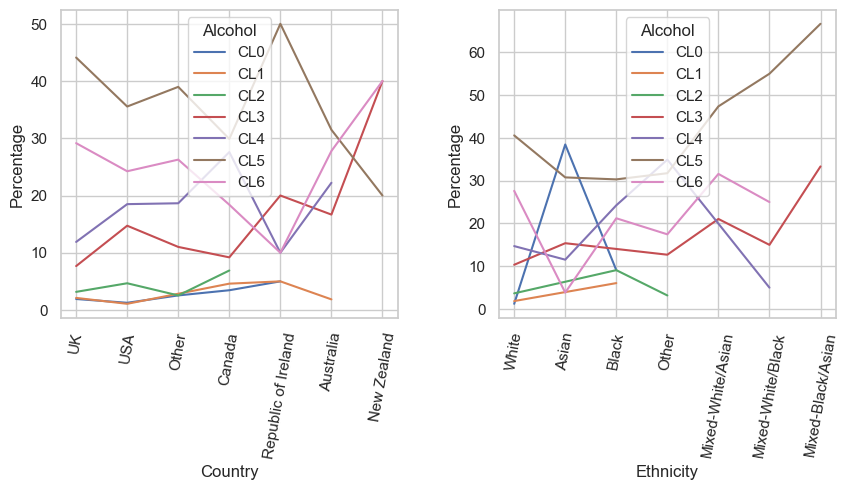

In [201]:
fig, ax = plt.subplots(1,2, figsize = (10,4))
plt.subplots_adjust(wspace = 0.3)

sns.lineplot(data = ac, x='Country', y='Percentage',hue='Alcohol',ax=ax[0])

sns.lineplot(data = ae, x='Ethnicity', y='Percentage',hue='Alcohol',ax=ax[1])
for ax in ax:
    ax.tick_params(axis='x', rotation=80)

plt.show()

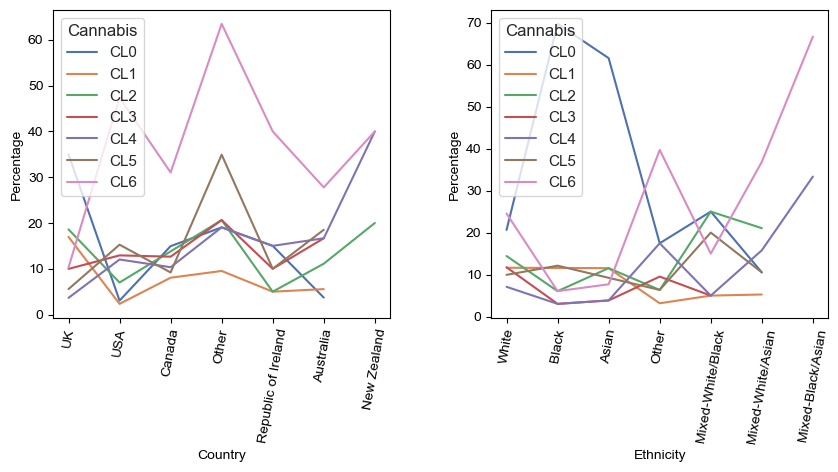

In [188]:
fig, ax = plt.subplots(1,2, figsize = (10,4))
plt.subplots_adjust(wspace = 0.3)
sns.set(style='whitegrid')
sns.lineplot(data = cc, x='Country', y='Percentage',hue='Cannabis',ax=ax[0])
sns.lineplot(data = ce, x='Ethnicity', y='Percentage',hue='Cannabis',ax=ax[1])
for ax in ax:
    ax.tick_params(axis='x', rotation=80)
plt.show()

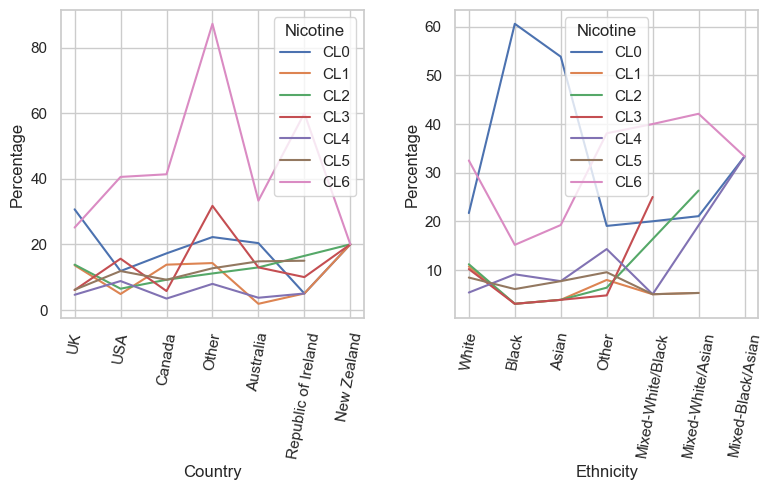

In [189]:
fig, ax = plt.subplots(1,2, figsize = (9,4))
plt.subplots_adjust(wspace = 0.3)
sns.lineplot(data = nc, x='Country', y='Percentage',hue='Nicotine',ax=ax[0])
sns.lineplot(data = ne, x='Ethnicity', y='Percentage',hue='Nicotine',ax=ax[1])
for ax in ax:
    ax.tick_params(axis='x', rotation=80)
plt.show()

In [150]:
age_cannabis=new_file[['Age','Cannabis']].value_counts().unstack().reset_index()
age_cannabis.fillna(0,inplace=True)
age_cannabis

Cannabis,Age,0,1,2,3,4,5,6
0,18-24,58.0,3.0,46.0,80.0,78.0,114.0,264.0
1,25-34,104.0,34.0,105.0,70.0,32.0,42.0,94.0
2,35-44,99.0,63.0,70.0,33.0,16.0,17.0,57.0
3,45-54,103.0,82.0,34.0,20.0,10.0,9.0,36.0
4,55-64,35.0,21.0,11.0,7.0,4.0,3.0,12.0
5,65+,13.0,4.0,0.0,1.0,0.0,0.0,0.0
